**Author**: *Athanasios Papageorgiou* (ΑM: 160, sakispap95@gmail.com, apapage3@csd.auth.gr)

**Find this project on GitHub:** https://github.com/SakisPap/Rock-Scissors-Paper-Agent

# Final Project 2023 | Rock-Scissors-Paper Agent

### Libraries import

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from google.colab import drive
import cv2
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import random
from PIL import Image

### Assets import

In [ ]:
drive.mount('/content/drive')

rock_assets = '/content/drive/MyDrive/ML_ASSETS/RPS/rock'
paper_assets = '/content/drive/MyDrive/ML_ASSETS/RPS/paper'
scissors_assets = '/content/drive/MyDrive/ML_ASSETS/RPS/scissors'

custom_assets = '/content/drive/MyDrive/ML_ASSETS/RPS/custom'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Data preperation (methods)

In [ ]:
def resize_image(image, size=(150, 150)):
    return cv2.resize(image, size, interpolation=cv2.INTER_AREA)

In [ ]:
def convert_to_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
def normalize_image(image):
    return image / 255.0

In [ ]:
def process_image(image_path):
    # load image
    image = cv2.imread(image_path)

    # resize it
    resized_image = resize_image(image)

    # convet to grayscale
    grayscale_image = convert_to_grayscale(resized_image)

    # normalization
    normalized_image = normalize_image(grayscale_image)

    return normalized_image

### Preprocessing

In [ ]:
images = []
labels = []

for image_name in os.listdir(rock_assets):
    image = process_image(os.path.join(rock_assets, image_name))
    images.append(image)
    labels.append(0)  # 0 = rock

for image_name in os.listdir(scissors_assets):
    image = process_image(os.path.join(scissors_assets, image_name))
    images.append(image)
    labels.append(1)  # 1 = scissors

for image_name in os.listdir(paper_assets):
    image = process_image(os.path.join(paper_assets, image_name))
    images.append(image)
    labels.append(2)  # 2 = paper

# convert to numpy arrays
images = np.array(images)
labels = np.array(labels)

### Preview

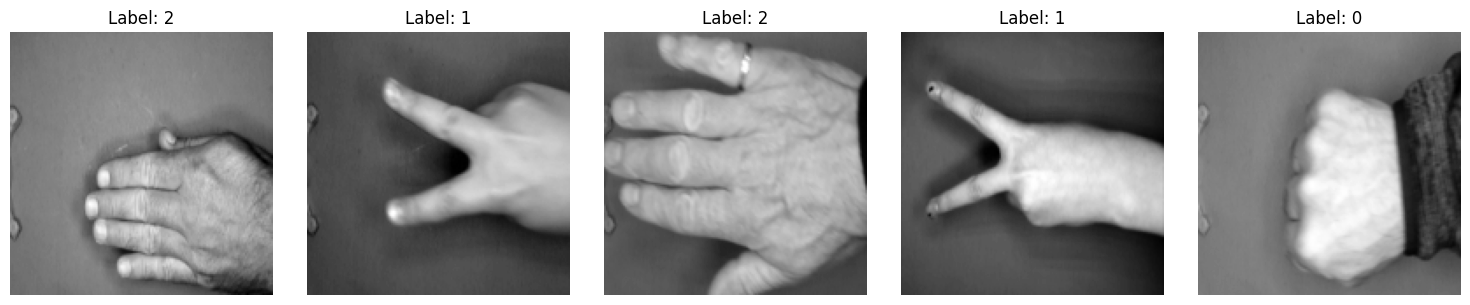

In [ ]:
# number of images to preview
num_images_to_show = 5

fig, axes = plt.subplots(1, num_images_to_show, figsize=(15, 3))
axes = axes.flatten()

for i in range(num_images_to_show):
    # select a random image from the dataset
    idx = np.random.randint(0, len(images))
    axes[i].imshow(images[idx], cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f'Label: {labels[idx]}')

plt.tight_layout()
plt.show()

### Split and train

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.20, stratify=labels)

In [ ]:
# CNN model configuration
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(3))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 flatten_7 (Flatten)         (None, 73984)            

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
55/55 [==============================] - 79s 1s/step - loss: 1.1129 - accuracy: 0.4080 - val_loss: 0.8437 - val_accuracy: 0.6279
Epoch 2/15
55/55 [==============================] - 74s 1s/step - loss: 0.5117 - accuracy: 0.8189 - val_loss: 0.4176 - val_accuracy: 0.8744
Epoch 3/15
55/55 [==============================] - 73s 1s/step - loss: 0.2895 - accuracy: 0.9097 - val_loss: 0.3164 - val_accuracy: 0.8836
Epoch 4/15
55/55 [==============================] - 74s 1s/step - loss: 0.1901 - accuracy: 0.9406 - val_loss: 0.2433 - val_accuracy: 0.9338
Epoch 5/15
55/55 [==============================] - 74s 1s/step - loss: 0.1399 - accuracy: 0.9549 - val_loss: 0.1870 - val_accuracy: 0.9406
Epoch 6/15
55/55 [==============================] - 72s 1s/step - loss: 0.0705 - accuracy: 0.9783 - val_loss: 0.1987 - val_accuracy: 0.9406
Epoch 7/15
55/55 [==============================] - 82s 1s/step - loss: 0.0543 - accuracy: 0.9823 - val_loss: 0.2484 - val_accuracy: 0.9361
Epoch 8/15
55/55 [==

### Evaluation

In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print('Test accuracy:', test_acc)

14/14 - 6s - loss: 0.2582 - accuracy: 0.9543 - 6s/epoch - 443ms/step
Test accuracy: 0.9543378949165344


In [ ]:
# select a random image alongside its corresponding label
def select_random_image(images, labels):
    random_index = np.random.randint(0, len(images))
    return images[random_index], labels[random_index]

In [ ]:
# select an image
image, label = select_random_image(x_test, y_test)
image = np.expand_dims(image, axis=0)

# predict the label of the image
predictions = model.predict(image)
predicted_label = np.argmax(predictions)

1/1 [==============================] - 0s 96ms/step


In [ ]:
def display_image(image):
  plt.imshow(image, cmap='gray')
  plt.axis('off')
  plt.show()

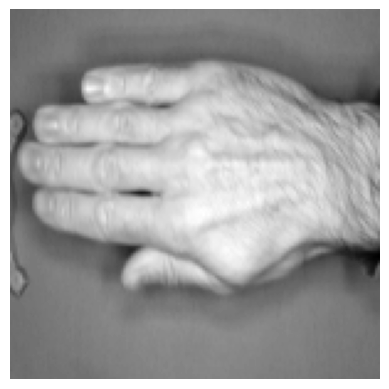

In [ ]:
# preview image
image = np.squeeze(image)
display_image(image)

In [ ]:
label, predicted_label
print(f"Actual category: {['Rock', 'Scissors', 'Paper'][label]}")
print(f"Predicted category: {['Rock', 'Scissors', 'Paper'][predicted_label]}")

Actual category: Paper
Predicted category: Paper


### Agent deception

In [ ]:
# probability based vertical image flip
def vertical_flip(image, probability=0.5):
    if random.random() < probability:
        print("Agent used Deception: Image vertically flipped!")
        return cv2.flip(image, 0)
    return image

In [ ]:
# probability based horizontal flip
def horizontal_flip(image, probability=0.5):
    if random.random() < probability:
        print("Agent used Deception: Image horizontally flipped!")
        return cv2.flip(image, 1)
    return image

In [ ]:
# noise
def add_noise(image, mean=0, sigma=0.05):
    row, col = image.shape
    gauss = np.random.normal(mean, sigma, (row, col))
    noisy_image = image + gauss
    noisy_image = np.clip(noisy_image, 0, 1)
    noisy_image = noisy_image.astype(np.uint8)
    return noisy_image

In [ ]:
# image tampering (flipping + noise)
def tamper_image(image):
  image = vertical_flip(image)
  image = horizontal_flip(image)
  image = add_noise(image)
  return image

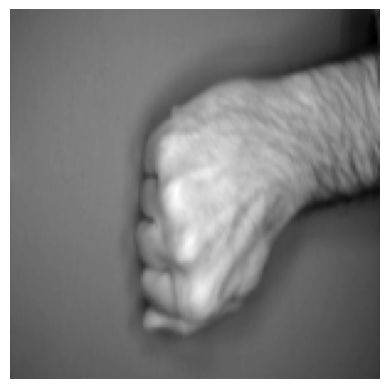

In [ ]:
# preview image BEFORE tamper
image, label = select_random_image(x_test, y_test)
display_image(image)

Agent used Deception: Image vertically flipped!
Agent used Deception: Image horizontally flipped!


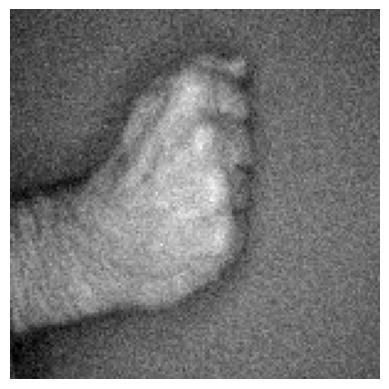

In [ ]:
# preview image AFTER tamper
tampered_image = tamper_image(image)
display_image(tampered_image)

### The GAME

In [ ]:
# number of rounds to play
TOTAL_ROUNDS = 100

rounds_won = 0
wallet = 0
profits = []

for i in range(TOTAL_ROUNDS):
  image, label = select_random_image(x_test, y_test)

  image = tamper_image(image)
  image = np.expand_dims(image, axis=0)

  predictions = model.predict(image)
  predicted_label = np.argmax(predictions)

  print(f"Actual category: {['Rock', 'Scissors', 'Paper'][label]}")
  print(f"Predicted category: {['Rock', 'Scissors', 'Paper'][predicted_label]}")

  if label == predicted_label:
    rounds_won+=1
    wallet+=1
    profits.append(1) # we get +1$ if we win
  else:
    wallet-=1
    profits.append(-1) # we give -1$ if we loose

print("============================================================")
print(f"Your AGENT won {rounds_won} out of {TOTAL_ROUNDS} rounds!")
print(f"Wallet balance: {wallet}$")
print("============================================================")

Agent used Deception: Image horizontally flipped!
1/1 [==============================] - 0s 33ms/step
Actual category: Rock
Predicted category: Paper
Agent used Deception: Image vertically flipped!
1/1 [==============================] - 0s 34ms/step
Actual category: Rock
Predicted category: Rock
Agent used Deception: Image vertically flipped!
1/1 [==============================] - 0s 32ms/step
Actual category: Paper
Predicted category: Paper
Agent used Deception: Image horizontally flipped!
1/1 [==============================] - 0s 48ms/step
Actual category: Paper
Predicted category: Paper
Agent used Deception: Image vertically flipped!
Agent used Deception: Image horizontally flipped!
1/1 [==============================] - 0s 35ms/step
Actual category: Paper
Predicted category: Paper
Agent used Deception: Image vertically flipped!
1/1 [==============================] - 0s 36ms/step
Actual category: Paper
Predicted category: Paper
1/1 [==============================] - 0s 38ms/step
Act

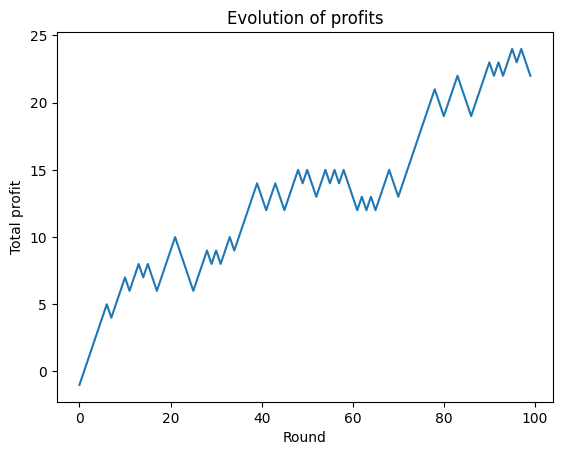

In [ ]:
cumulative_profits = np.cumsum(profits)
plt.plot(range(TOTAL_ROUNDS), cumulative_profits)
plt.title('Evolution of profits')
plt.xlabel('Round')
plt.ylabel('Total profit')
plt.show()

### Custom Images

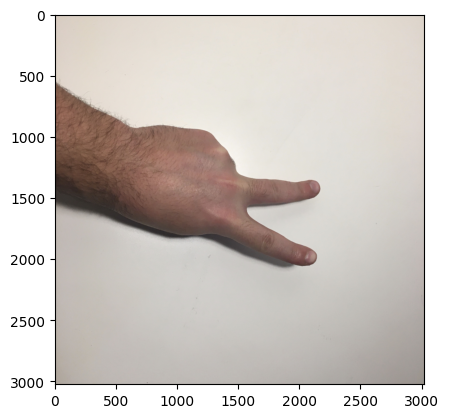

In [ ]:
custom_scissors_image_path = custom_assets + '/scissors.JPG' # this is my own hand (very ugly, I know)
image = Image.open(custom_scissors_image_path)
plt.imshow(image)
plt.show()

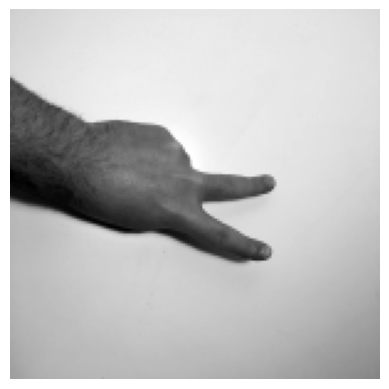

In [ ]:
processed_image = process_image(custom_scissors_image_path)
display_image(processed_image)

In [ ]:
image = np.expand_dims(processed_image, axis=0)
predictions = model.predict(image)
predicted_label = np.argmax(predictions)

print(f"Actual category: Scissors")
print(f"Predicted category: {['Rock', 'Scissors', 'Paper'][predicted_label]}")

1/1 [==============================] - 0s 43ms/step
Actual category: Scissors
Predicted category: Scissors
